In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import time 
from sklearn import metrics
mnist = fetch_openml('mnist_784', version=1)


In [2]:
X, y = mnist["data"], mnist["target"] # X, y: pandas DataFrame
X, y = X.to_numpy(), y.to_numpy()
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size= 0.25, random_state=42)

In [3]:
param_grid =[{'n_neighbors' : [3, 5, 10] ,'leaf_size' : [10, 30, 50]}]

    
knn_clf = KNeighborsClassifier(weights='distance')
grid_search = GridSearchCV(knn_clf, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(weights='distance'),
             param_grid=[{'leaf_size': [10, 30, 50],
                          'n_neighbors': [3, 5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [4]:
grid_search.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=3, weights='distance')

In [7]:
knn_clf1 = KNeighborsClassifier(weights='distance', n_neighbors = 3, leaf_size = 10 )
time1=time.time()
knn_clf1.fit(X_train,y_train)
time2=time.time()
print("학습시간 :", time2-time1)

학습시간 : 0.049193382263183594


In [8]:
knn_clf1.score(X_valid,y_valid)

0.9729285714285715

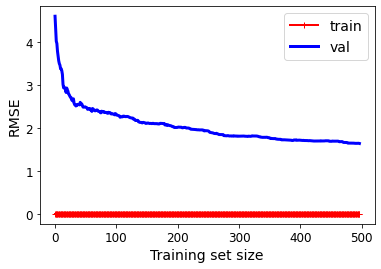

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_learning_curves(model, X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(3, 500):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
knn_clf1 = KNeighborsClassifier(weights='distance', n_neighbors = 3, leaf_size = 10 )
plot_learning_curves(knn_clf1,X,y)
               # not shown in the book
plt.show()                                      # not shown